# Logistic Regression

In [1]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

In [3]:
X = []  
y = []   

In [4]:
def loadDataSet():
    f=open('data.txt')
    # Read data line by line and use strip to remove the Spaces 
    for line in f.readlines():
        nline=line.strip().split()
        # X has two columns
        X.append([float(nline[0]),float(nline[1])])
        y.append(int(nline[2]))
    return mat(X).T,mat(y)

In [5]:
X,y=loadDataSet()

In [6]:
np.random.randn(4).reshape(2,2)

array([[ 0.0670709 , -0.32804226],
       [-0.07510834,  0.27710622]])

### Plotting the Data

1) for plotting the data, I use the seaborn library.
To use the seaborn, first I need to have data in forms of DataFrame (Pandas), because the seaborn is based on pandas.

In [7]:
# building a dataset from the text file
my_data = pd.read_csv("C:\\Users\\Hana\\Desktop\\Question5.txt",sep="   ", header=None)
my_data.columns=['X1','X2', 'y']  # X1 and X2 are our features and y is the label.
my_data

<ipython-input-7-dd726cc046bc>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  my_data = pd.read_csv("C:\\Users\\Hana\\Desktop\\Question5.txt",sep="   ", header=None)


,X1,X2,y
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0
...,...,...,...
95,0.677983,2.556666,1
96,0.761349,10.693862,0
97,-2.168791,0.143632,1
98,1.388610,9.341997,0


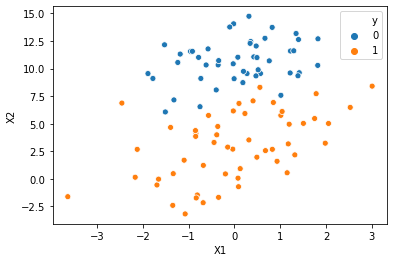

In [8]:
import seaborn as sns   # Calling the seaborn library and naming it as 'sns'
sns.scatterplot(data=my_data, x='X1', y='X2', hue='y') # the scatter plot of our data in two color seperated based on the labels

2) We also can use numpy and matplotlib library for plotting the data as following:

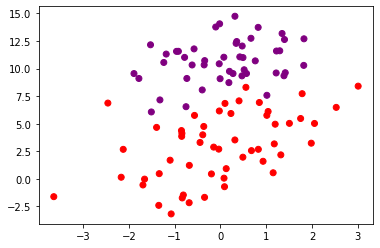

In [9]:
X = np.array(X)
y = np.array(y)
plt.scatter(X[0],X[1],c=np.array(np.where(y<1,'purple','red'))[0,:])
plt.show()


In [10]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [11]:
def Logistic(X,y,W,b,n,alpha,iterations):
    
    '''
    X: input data
    y: labels
    W: weight
    b: bias
    n: number of samples
    alpha: learning rate
    iterations: the number of iteration
    '''
    J = zeros((iterations,1))
    for i in range(iterations):
        
        # step1 forward propagation
        z = np.dot(X.T, W) + b         # Defining the z which is the activation function and a linear function   
        y_hat = sigmoid(z)          ## one value in range [0,1] 
         
        # compute cost function
        Loss = -1/n * np.sum(y.T * np.log(y_hat)) + (1-y).T * np.log(1-y_hat)
        #print(Loss, type(Loss))
        #print(np.average(Loss))
        J[i] = np.average(Loss)
        
        # step2 backpropagation
        dW = np.dot(X, (y_hat - y.T))/n
        db = 1/n * np.sum(y_hat - y.T)  
                     
        # step3 gradient descent

        W = W - alpha * dW    
        b -= alpha * db
    return y_hat,W,b,J


In [12]:
shape(log(1-y))
#shape(y)
#shape(sigmoid(np.arange(100).reshape(100,1)))

<ipython-input-12-9b7a5822c734>:1: RuntimeWarning: divide by zero encountered in log
  shape(log(1-y))


(1, 100)

In [13]:
def plotBestFit(X,y,J,W,b,n,y_hat):
    
    '''
    X: input data
    y: labels
    J: cost values
    W: weight
    b: bias
    n: number of samples
    y_hat: the predict labels from Logistic Regression 
    '''
    
    # Plot cost function figure
    plt.plot(J)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.show()
    
    # Plot the final classification figure
    plt.scatter(X[0], X[1], c = np.array(np.where(y < 1,'purple','red'))[0,:])
    plt.scatter(np.arange(-4,4,0.1),(-W[0] * np.arange(-4,4,0.1) - b) / W[1], c='black')
    plt.xlabel('X_0')
    plt.ylabel('X_1')
    plt.show()
    #colors = np.array(np.where(y<1,'blue','red'))
    #plt.scatter(np.array(X[:,0]), np.array(X[:,1]), c=colors[:,0])
    #plt.scatter(np.arange(-4,4,0.1), np.array((-(0.91464413) * X.T -  8.515809773934198)/(-1.18448261)), c='black')
 
    

In [14]:
num = X.shape[0]  # number of features
n = X.shape[1] # number of samples
print("Number of features is: {} \nnumber of samples is: {}".format(num,n))

Number of features is: 2 
number of samples is: 100


In [15]:
# Initianlize the weights and bias
## We can initialize W in two ways: 1) equaling all values to zero (W = np.zeros((num,1))), 
###2) using random and randomly slecet values (np.random.rand((num,1)))

W = np.zeros((num,1)) ##Weights vector should be the same shape as the features vector
#W = np.random.rand((num,1))

import random
b = random.uniform(-1,1)
print(b)
W.shape    

0.007293793916684388


(2, 1)

In [16]:
# Learning rate

alpha= 0.1

In [17]:
# Iterations

iterations = 100

In [18]:
# Optimal Learning rate and Iterations
print('Learning Rate: {}\nNumber of nIteration: {}'.format(alpha, iterations))

Learning Rate: 0.1
Number of nIteration: 100


In [19]:
# Get the results from Logistic function
y_hat,W,b,J = Logistic(X, y, W, b, n, alpha, iterations)
print(W,b)
#print('y_hat: {}\nW: {}\nb: {}\nJ: {}'.format(y_hat,W,b,J))

[[ 0.19656582]
 [-0.29135644]] 1.491663127563809


In [20]:
#Final Weights and b
print("Weights: {}\nb: {}".format(W,b))

Weights: [[ 0.19656582]
 [-0.29135644]]
b: 1.491663127563809


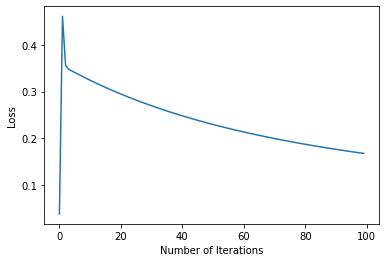

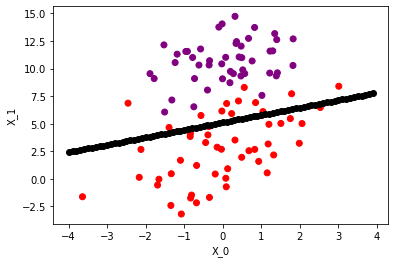

In [21]:
# Plot figures
plotBestFit(X, y, J, W, b, n, y_hat)

## Final optimal values

Weights: [[ 0.91464413]
 [-1.18448261]]
 
 
b: 8.515809773934198

alpha: 0.1

iterations : 100